Import Libraries

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
Load Data From CSV File

In [2]:
my_data = pd.read_csv("1991_stats2.csv")
my_data.head()

Pos    MP    FG   FGA    FG%   3P  3PA    3P%    2P   2PA  ...  ORB  DRB  \
0  SF  40.4   9.5  17.7  0.536  0.5  1.6  0.301   9.0  16.0  ...  1.7  3.7   
1  PF  40.3  10.3  19.6  0.527  0.0  0.2  0.286  10.3  19.4  ...  2.9  8.9   
2  SG  39.3   9.1  18.5  0.494  0.5  1.5  0.348   8.6  17.0  ...  1.9  4.0   
3  PG  39.2   9.0  18.9  0.476  1.2  3.1  0.385   7.8  15.8  ...  1.1  3.0   
4  SF  39.0   7.2  16.0  0.448  0.0  0.1  0.200   7.1  15.9  ...  2.3  4.9   

    TRB  AST  STL  BLK  TOV   PF   PTS  isAllNBA  
0   5.4  4.0  2.1  0.8  3.0  2.1  25.7         1  
1  11.8  3.3  1.1  1.0  3.0  3.3  29.0         1  
2   5.9  3.1  1.6  0.4  3.0  2.7  23.9         0  
3   4.0  9.7  2.6  0.1  3.3  2.8  22.9         0  
4   7.2  4.2  2.0  0.6  2.5  3.1  18.0         0  

[5 rows x 25 columns]

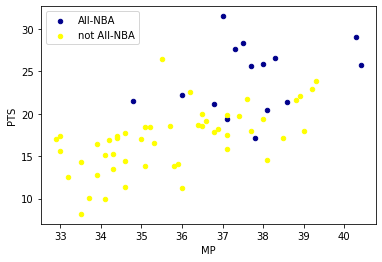

In [3]:
ax = my_data[my_data['isAllNBA'] == 1][0:50].plot(kind='scatter', x='MP', y='PTS', color='DarkBlue', label='All-NBA');
my_data[my_data['isAllNBA'] == 0][0:50].plot(kind='scatter', x='MP', y='PTS', color='Yellow', label='not All-NBA', ax=ax);
plt.show()

Data pre-processing and selection

In [4]:
feature_df = my_data[['Pos', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].values
le_pos = preprocessing.LabelEncoder()
le_pos.fit(['PG','SG','SF','PF','C'])
feature_df[:,0] = le_pos.transform(feature_df[:,0])
X_train = np.asarray(feature_df)
X_train[0:5]

array([[3, 40.4, 9.5, 17.7, 0.536, 0.5, 1.6, 0.301, 9.0, 16.0, 0.56,
        0.55, 6.3, 7.1, 0.884, 1.7, 3.7, 5.4, 4.0, 2.1, 0.8, 3.0, 2.1,
        25.7],
       [1, 40.3, 10.3, 19.6, 0.527, 0.0, 0.2, 0.286, 10.3, 19.4, 0.529,
        0.528, 8.3, 10.8, 0.77, 2.9, 8.9, 11.8, 3.3, 1.1, 1.0, 3.0, 3.3,
        29.0],
       [4, 39.3, 9.1, 18.5, 0.494, 0.5, 1.5, 0.348, 8.6, 17.0, 0.506,
        0.508, 5.1, 6.0, 0.847, 1.9, 4.0, 5.9, 3.1, 1.6, 0.4, 3.0, 2.7,
        23.9],
       [2, 39.2, 9.0, 18.9, 0.476, 1.2, 3.1, 0.385, 7.8, 15.8, 0.494,
        0.508, 3.7, 4.6, 0.803, 1.1, 3.0, 4.0, 9.7, 2.6, 0.1, 3.3, 2.8,
        22.9],
       [3, 39.0, 7.2, 16.0, 0.448, 0.0, 0.1, 0.2, 7.1, 15.9, 0.45, 0.449,
        3.6, 4.5, 0.798, 2.3, 4.9, 7.2, 4.2, 2.0, 0.6, 2.5, 3.1, 18.0]],
      dtype=object)

In [5]:
my_data['isAllNBA'] = my_data['isAllNBA'].astype('int')
y_train = np.asarray(my_data['isAllNBA'])
y_train [0:5]

array([1, 1, 0, 0, 0])

In [6]:
my_data2 = pd.read_csv("1992_stats.csv")
my_data2.head()

Pos    MP    FG   FGA    FG%   3P  3PA    3P%   2P   2PA  ...  ORB   DRB  \
0  SF  41.3  10.2  19.6  0.524  0.8  2.2  0.366  9.5  17.4  ...  1.6   4.0   
1  PG  41.1   9.1  19.7  0.461  1.6  4.6  0.338  7.5  15.0  ...  1.0   2.8   
2  PF  40.3   4.2   7.7  0.539  0.4  1.2  0.317  3.8   6.5  ...  6.4  12.3   
3  SF  39.0   8.3  18.6  0.447  0.2  0.8  0.209  8.2  17.9  ...  1.8   3.8   
4  SG  38.9   7.2  16.0  0.448  0.6  1.5  0.408  6.6  14.5  ...  1.0   1.3   

    TRB   AST  STL  BLK  TOV   PF   PTS  isAllNBA  
0   5.6   3.5  2.1  0.8  2.5  2.1  25.6         1  
1   3.8  10.0  2.0  0.2  3.3  2.6  23.4         1  
2  18.7   2.3  0.8  0.9  1.7  3.0   9.8         1  
3   5.6   4.7  1.4  0.4  2.4  1.6  19.9         0  
4   2.3   4.6  0.9  0.1  2.4  1.8  19.9         0  

[5 rows x 25 columns]

In [7]:
feature_df2 = my_data2[['Pos', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].values
le_pos2 = preprocessing.LabelEncoder()
le_pos2.fit(['PG','SG','SF','PF','C'])
feature_df2[:,0] = le_pos2.transform(feature_df2[:,0])
X_test = np.asarray(feature_df2)
X_test[0:5]

array([[3, 41.3, 10.2, 19.6, 0.524, 0.8, 2.2, 0.366, 9.5, 17.4, 0.544,
        0.544, 4.3, 5.2, 0.833, 1.6, 4.0, 5.6, 3.5, 2.1, 0.8, 2.5, 2.1,
        25.6],
       [2, 41.1, 9.1, 19.7, 0.461, 1.6, 4.6, 0.338, 7.5, 15.0, 0.499,
        0.501, 3.7, 4.8, 0.766, 1.0, 2.8, 3.8, 10.0, 2.0, 0.2, 3.3, 2.6,
        23.4],
       [1, 40.3, 4.2, 7.7, 0.539, 0.4, 1.2, 0.317, 3.8, 6.5, 0.581,
        0.564, 1.0, 1.7, 0.6, 6.4, 12.3, 18.7, 2.3, 0.8, 0.9, 1.7, 3.0,
        9.8],
       [3, 39.0, 8.3, 18.6, 0.447, 0.2, 0.8, 0.209, 8.2, 17.9, 0.457,
        0.451, 3.1, 3.8, 0.814, 1.8, 3.8, 5.6, 4.7, 1.4, 0.4, 2.4, 1.6,
        19.9],
       [4, 38.9, 7.2, 16.0, 0.448, 0.6, 1.5, 0.408, 6.6, 14.5, 0.452,
        0.466, 5.0, 5.8, 0.867, 1.0, 1.3, 2.3, 4.6, 0.9, 0.1, 2.4, 1.8,
        19.9]], dtype=object)

In [8]:
my_data2['isAllNBA'] = my_data2['isAllNBA'].astype('int')
y_test = np.asarray(my_data2['isAllNBA'])
y_test [0:5]

array([1, 1, 1, 0, 0])

Modeling

In [9]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [10]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0])

Evaluation

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       135
           1       1.00      0.13      0.24        15

    accuracy                           0.91       150
   macro avg       0.96      0.57      0.59       150
weighted avg       0.92      0.91      0.88       150

Confusion matrix, without normalization
[[135   0]
 [ 13   2]]


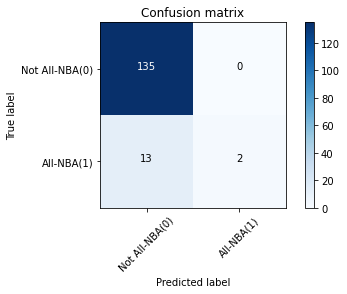

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [14]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.8821866555809602

In [15]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.9121621621621622

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       135
           1       1.00      0.13      0.24        15

    accuracy                           0.91       150
   macro avg       0.96      0.57      0.59       150
weighted avg       0.92      0.91      0.88       150

Confusion matrix, without normalization
[[135   0]
 [ 13   2]]
Avg F1-score: 0.8822
Jaccard score: 0.9122


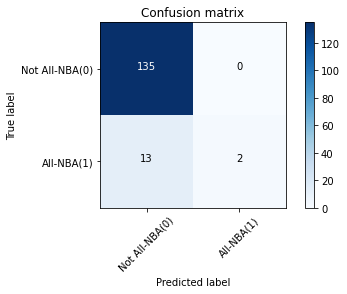

In [16]:
from sklearn import svm
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf.predict(X_test)
yhat2 [0:5]
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[0, 1])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat2))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2,pos_label=0))

In [17]:
yhat[0:100]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
yhat2[0:100]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])